# PROJECT ON - PREDICT STATUS OF CHRONIC KIDNEY DISEASES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\sameer narwade\Downloads\kidney_disease.csv')
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
abb = pd.read_excel(r'C:\Users\sameer narwade\Desktop\abbreviations.xlsx')

In [4]:
abb.head()

,Unnamed: 0,Unnamed: 1
0,id,id
1,age,age
2,bp,blood pressure
3,sg,specific gravity
4,al,albumin


In [5]:
 df.columns = abb['Unnamed: 1'].values

In [6]:
df.head()

,id,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,...,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [7]:
df.dtypes

id                           int64
age                        float64
blood pressure             float64
specific gravity           float64
albumin                    float64
sugar                      float64
red blood cells             object
 pus cell                   object
pus cell clumps             object
bacteria                    object
blood glucose random       float64
blood urea                 float64
serum creatinine           float64
sodium                     float64
potassium                  float64
haemoglobin                float64
packed cell volume          object
white blood cell count      object
red blood cell count        object
ypertension                 object
diabetes mellitus           object
coronary artery disease     object
appetite                    object
pedal edema                 object
anemia                      object
class                       object
dtype: object

In [8]:
def convert_dtype(df,feature):
    df[feature] = pd.to_numeric(df[feature],errors = 'coerce')
       

In [9]:
features= ['packed cell volume','white blood cell count','red blood cell count']
for i in features:
    convert_dtype(df,i)

In [10]:
df.dtypes

id                           int64
age                        float64
blood pressure             float64
specific gravity           float64
albumin                    float64
sugar                      float64
red blood cells             object
 pus cell                   object
pus cell clumps             object
bacteria                    object
blood glucose random       float64
blood urea                 float64
serum creatinine           float64
sodium                     float64
potassium                  float64
haemoglobin                float64
packed cell volume         float64
white blood cell count     float64
red blood cell count       float64
ypertension                 object
diabetes mellitus           object
coronary artery disease     object
appetite                    object
pedal edema                 object
anemia                      object
class                       object
dtype: object

In [11]:
df.drop('id',axis=1,inplace= True)

In [12]:
def extract_cols(df):
    cat_col = [col for col in df.columns if df[col].dtype == 'object']
    num_col = [col for col in df.columns if df[col].dtype != 'object']
    return cat_col,num_col

In [13]:
cat_cols,num_cols = extract_cols(df)
cat_cols

['red blood cells',
 ' pus cell',
 'pus cell clumps',
 'bacteria',
 'ypertension',
 'diabetes mellitus',
 'coronary artery disease',
 'appetite',
 'pedal edema',
 'anemia',
 'class']

In [14]:
for col in cat_cols:
    print('{} has {} unique items'.format(col,df[col].unique()))
    print('\n')


red blood cells has [nan 'normal' 'abnormal'] unique items


 pus cell has ['normal' 'abnormal' nan] unique items


pus cell clumps has ['notpresent' 'present' nan] unique items


bacteria has ['notpresent' 'present' nan] unique items


ypertension has ['yes' 'no' nan] unique items


diabetes mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] unique items


coronary artery disease has ['no' 'yes' '\tno' nan] unique items


appetite has ['good' 'poor' nan] unique items


pedal edema has ['no' 'yes' nan] unique items


anemia has ['no' 'yes' nan] unique items


class has ['ckd' 'ckd\t' 'notckd'] unique items




In [15]:
df['diabetes mellitus'].replace(to_replace={'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)
df['class'].replace(to_replace={'ckd\t':'ckd'},inplace=True)

In [16]:
df['coronary artery disease'].replace(to_replace={'\tno':'no'},inplace=True)

# PERFORM EDA

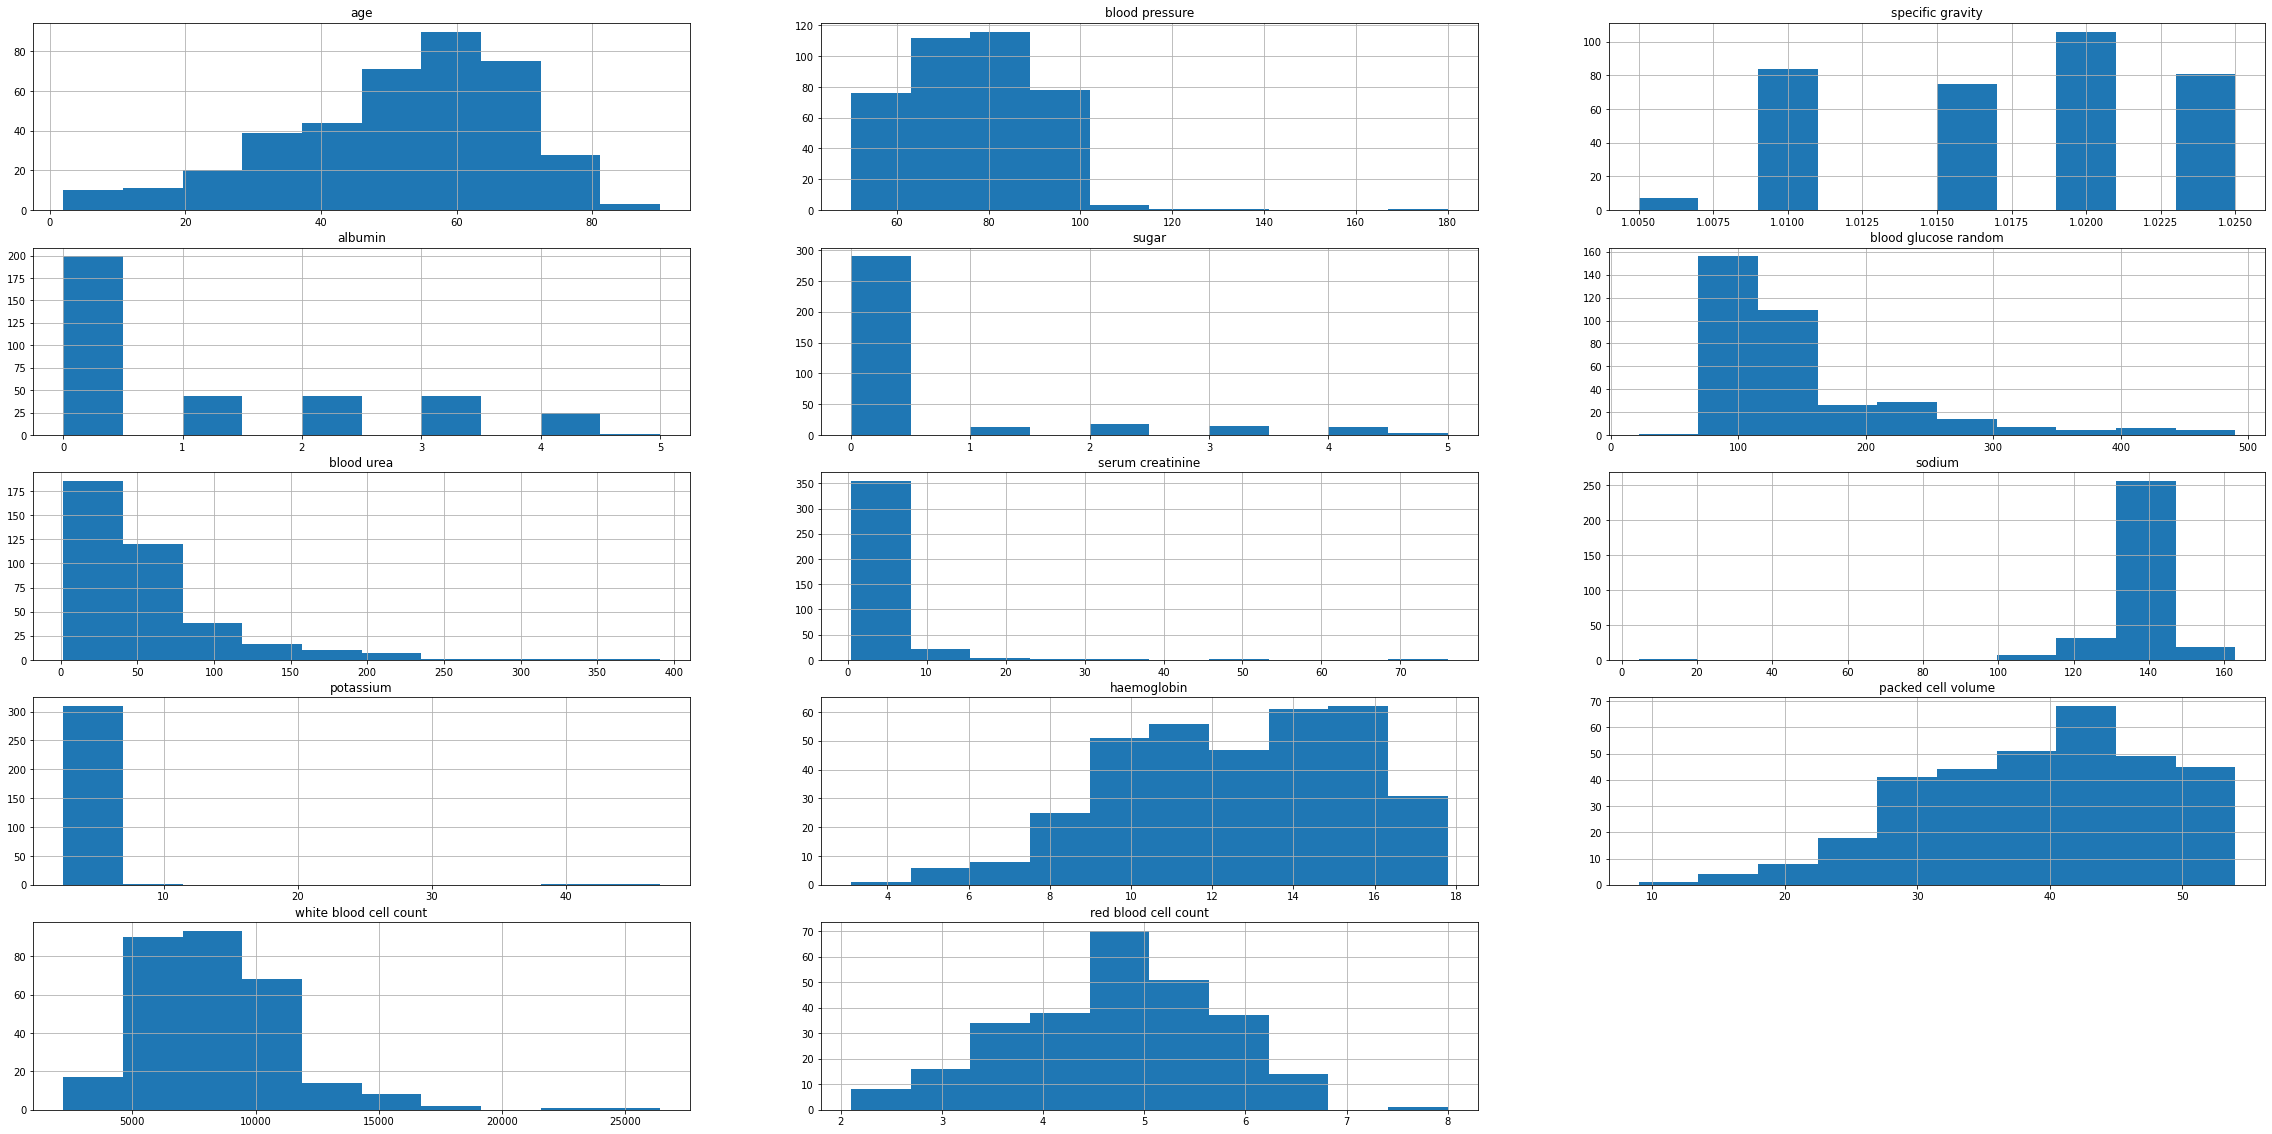

In [17]:
plt.figure(figsize=(40,20))

for i,feature in enumerate(num_cols):
    plt.subplot(5,3,i+1)
    df[feature].hist()
    plt.title(feature)
    

G:\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
G:\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
G:\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
G:\New folder\lib\site-packages\seaborn\_decorators.py:36: Futur

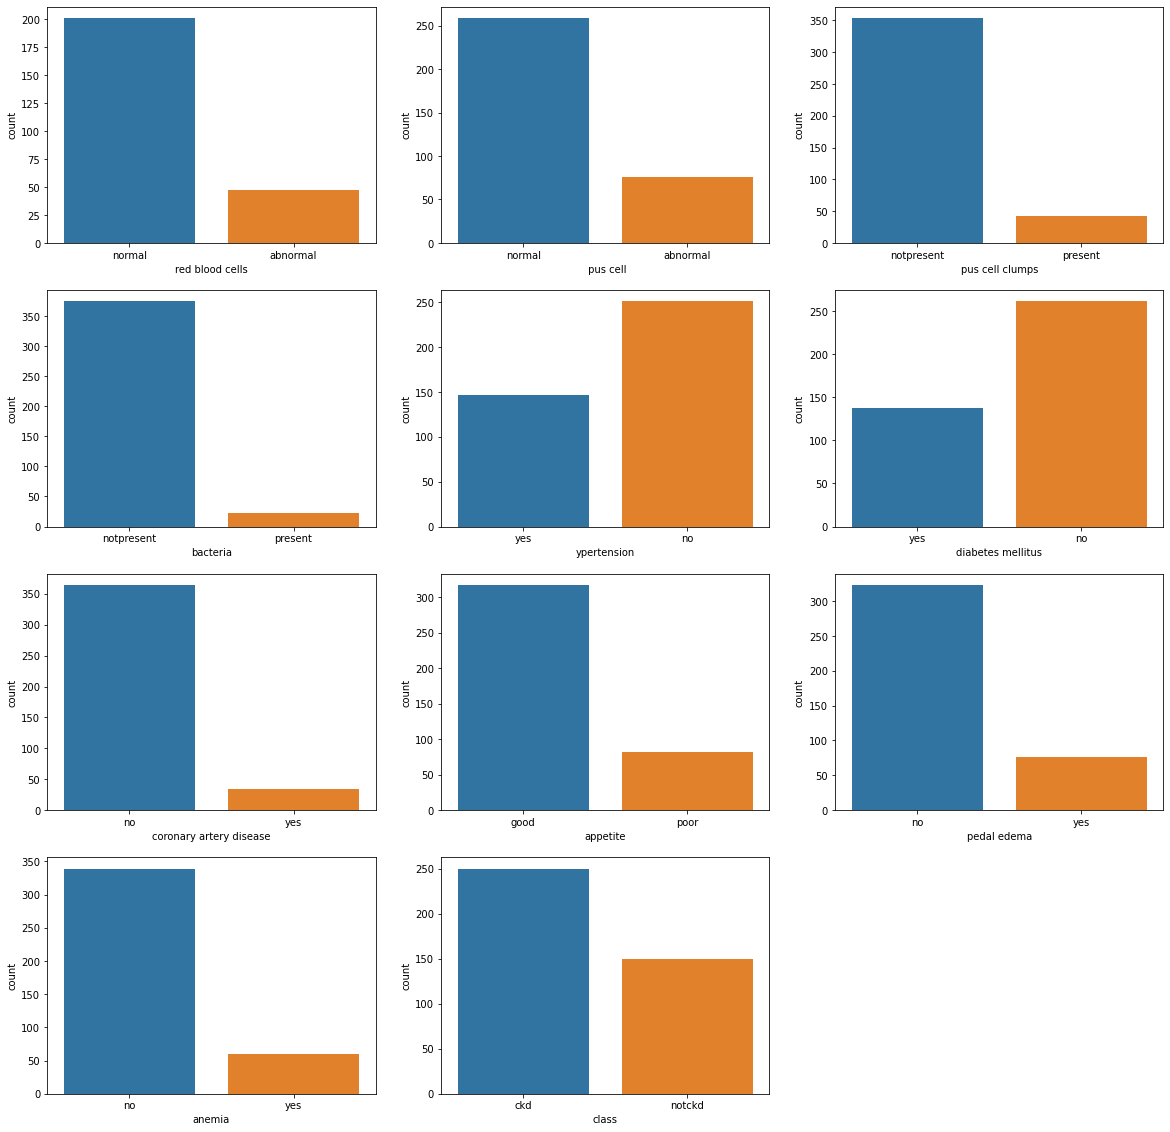

In [18]:
plt.figure(figsize=(20,20))

for i,feature in enumerate(cat_cols):
    plt.subplot(4,3,i+1)
    sns.countplot(df[feature])

G:\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

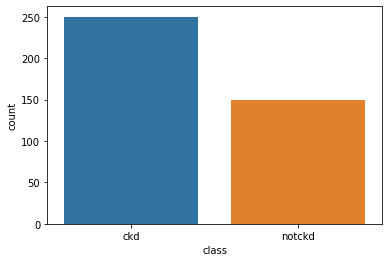

In [19]:
sns.countplot(df['class'])

<AxesSubplot:>

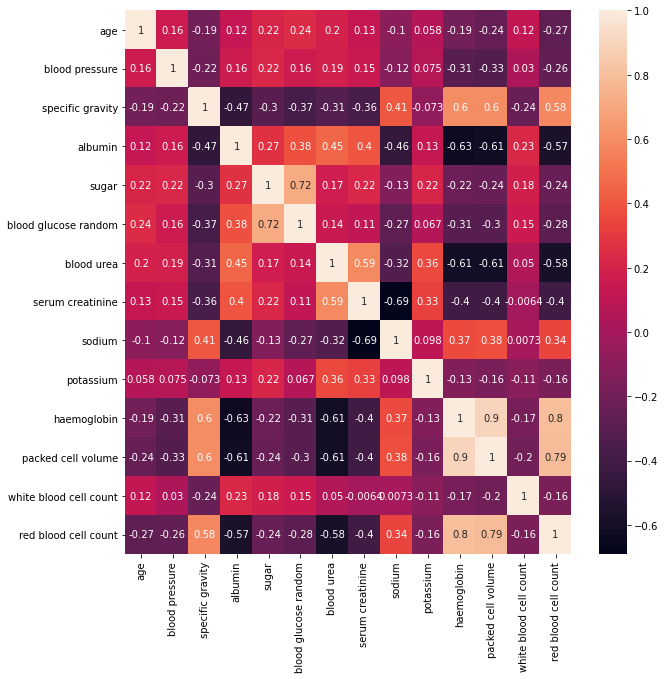

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

In [21]:
df.groupby(['red blood cells','class'])['red blood cell count'].agg(['count','mean','median','min','max'])

count      mean  median  min  max
red blood cells class                                    
abnormal        ckd        25  3.832000     3.7  2.5  5.6
normal          ckd        40  3.782500     3.8  2.1  8.0
                notckd    134  5.368657     5.3  4.4  6.5

In [22]:
import plotly.express as px

In [24]:
px.violin(df,y='red blood cell count',x='class',color='class')

In [32]:
def violin(col):
    fig = px.violin(df,y=col,x='class',color='class')
    return fig.show()

In [25]:
def scatter(col1,col2):
    fig = px.scatter(df,x=col1,y=col2,color='class')
    return fig.show()
    

In [28]:
def kde_plot(feature):
    grid = sns.FacetGrid(df,hue='class',aspect=2)
    grid.map(sns.kdeplot,feature)
    grid.add_legend()

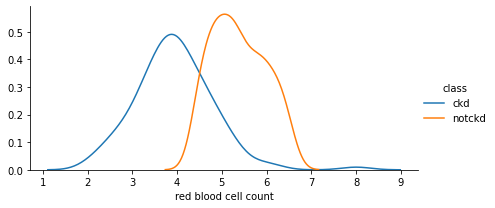

In [29]:
kde_plot('red blood cell count')

In [30]:
scatter('red blood cell count','packed cell volume')

In [31]:
scatter('red blood cell count','haemoglobin')

In [33]:
violin('packed cell volume')

In [34]:
violin('red blood cell count')

In [35]:
scatter('red blood cell count','albumin')

In [38]:
df.isnull().sum().sort_values(ascending=False)

red blood cells            152
red blood cell count       131
white blood cell count     106
potassium                   88
sodium                      87
packed cell volume          71
 pus cell                   65
haemoglobin                 52
sugar                       49
specific gravity            47
albumin                     46
blood glucose random        44
blood urea                  19
serum creatinine            17
blood pressure              12
age                          9
bacteria                     4
pus cell clumps              4
ypertension                  2
diabetes mellitus            2
coronary artery disease      2
anemia                       1
appetite                     1
pedal edema                  1
class                        0
dtype: int64

In [40]:
def random_value_imputation(feature):
    random_sample=df[feature].dropna().sample(df[feature].isnull().sum())
    random_sample.index=df[df[feature].isnull()].index
    df.loc[df[feature].isnull(),feature]=random_sample

In [41]:
random_value_imputation('red blood cells')

In [43]:
df['red blood cells'].isnull().sum()

0

In [45]:
for col in num_cols:
    random_value_imputation(col)

In [47]:
df[cat_cols].isnull().sum()

red blood cells             0
 pus cell                  65
pus cell clumps             4
bacteria                    4
ypertension                 2
diabetes mellitus           2
coronary artery disease     2
appetite                    1
pedal edema                 1
anemia                      1
class                       0
dtype: int64

In [49]:
random_value_imputation(' pus cell')

In [50]:
def impute_mode(feature):
    mode=df[feature].mode()[0]
    df[feature]=df[feature].fillna(mode)

In [51]:
for col in cat_cols:
    impute_mode(col)

In [52]:
df[cat_cols].isnull().sum()

red blood cells            0
 pus cell                  0
pus cell clumps            0
bacteria                   0
ypertension                0
diabetes mellitus          0
coronary artery disease    0
appetite                   0
pedal edema                0
anemia                     0
class                      0
dtype: int64

In [53]:
from sklearn.preprocessing import LabelEncoder

In [57]:
le = LabelEncoder()

In [58]:
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [59]:
df.head()

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,298.0,...,38.0,6000.0,3.0,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,4.9,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,0,0,0,0,0,0


In [60]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [61]:
ind_col = [col for col in df.columns if col!='class']
dep_col = 'class'

In [62]:
X = df[ind_col]
Y = df[dep_col]

In [63]:
X.head()

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,haemoglobin,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,15.4,44.0,7800.0,5.2,1,1,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,298.0,...,11.3,38.0,6000.0,3.0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,9.6,31.0,7500.0,4.9,0,1,0,1,0,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,11.2,32.0,6700.0,3.9,1,0,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,11.6,35.0,7300.0,4.6,0,0,0,0,0,0


In [64]:
ordered_feature=SelectKBest(score_func=chi2,k=20)
order_feature=ordered_feature.fit(X,Y)
order_feature

SelectKBest(k=20, score_func=<function chi2 at 0x000001F2B363BA60>)

In [65]:
order_feature.scores_

array([1.05910604e+02, 7.60712186e+01, 5.74117030e-03, 2.45040732e+02,
       1.01824381e+02, 1.12133333e+01, 1.51510248e+01, 2.52000000e+01,
       1.32000000e+01, 2.36204167e+03, 2.14940518e+03, 3.55286680e+02,
       3.18076849e+01, 3.03097195e+00, 1.18634667e+02, 3.57130971e+02,
       1.35781796e+04, 2.20225628e+01, 8.82000000e+01, 8.22000000e+01,
       2.04000000e+01, 4.92000000e+01, 4.56000000e+01, 3.60000000e+01])

In [68]:
df1 = pd.DataFrame(order_feature.scores_)
df1

,0
0,105.910604
1,76.071219
2,0.005741
3,245.040732
4,101.824381
5,11.213333
6,15.151025
7,25.200000
8,13.200000
9,2362.041669


In [72]:
df2 = pd.DataFrame(X.columns)
df2

,0
0,age
1,blood pressure
2,specific gravity
3,albumin
4,sugar
5,red blood cells
6,pus cell
7,pus cell clumps
8,bacteria
9,blood glucose random


In [75]:
data = pd.concat([df2,df1],axis=1)
data.columns = ['feature','score']
data

,feature,score
0,age,105.910604
1,blood pressure,76.071219
2,specific gravity,0.005741
3,albumin,245.040732
4,sugar,101.824381
5,red blood cells,11.213333
6,pus cell,15.151025
7,pus cell clumps,25.200000
8,bacteria,13.200000
9,blood glucose random,2362.041669


In [80]:
columns = data.nlargest(10,'score')['feature'].values
columns

array(['white blood cell count', 'blood glucose random', 'blood urea',
       'packed cell volume', 'serum creatinine', 'albumin', 'haemoglobin',
       'age', 'sugar', 'ypertension'], dtype=object)

In [81]:
X_new = df[columns]

In [83]:
X_new.head()

,white blood cell count,blood glucose random,blood urea,packed cell volume,serum creatinine,albumin,haemoglobin,age,sugar,ypertension
0,7800.0,121.0,36.0,44.0,1.2,1.0,15.4,48.0,0.0,1
1,6000.0,298.0,18.0,38.0,0.8,4.0,11.3,7.0,0.0,0
2,7500.0,423.0,53.0,31.0,1.8,2.0,9.6,62.0,3.0,0
3,6700.0,117.0,56.0,32.0,3.8,4.0,11.2,48.0,0.0,1
4,7300.0,106.0,26.0,35.0,1.4,2.0,11.6,51.0,0.0,0


In [84]:
from sklearn.model_selection import train_test_split

In [91]:
X_train,X_test,Y_train,Y_test = train_test_split(X_new,Y,test_size=0.25,random_state=0)

In [92]:
len(Y_train)

300

In [96]:
!pip install xgboost

In [97]:
from xgboost import XGBClassifier

In [116]:
params={
    'learning_rate':[0.05,0.20,0.25,0.03],
    'max_depth':[5,8,9,10,11],
    'min_child_weight':[1,3,5,7,9,2],
    'gamma':[0.0,0.2,0.5,0.3,0.4],
    'colsample_bytree':[0.3,0.4,0.7,0.8]
}

In [117]:
from sklearn.model_selection import RandomizedSearchCV

In [118]:
classifier = XGBClassifier()

In [119]:
random_search = RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [120]:
random_search.fit(X_train,Y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:   28.8s remaining:    9.0s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   28.9s finished
G:\New folder\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[19:51:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints...
                                           reg_alpha=None, reg_lambda=None,
                                           scale_pos_weight=None,
                                       

In [121]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7,
              enable_categorical=False, gamma=0.3, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [122]:
random_search.best_params_

{'min_child_weight': 1,
 'max_depth': 9,
 'learning_rate': 0.2,
 'gamma': 0.3,
 'colsample_bytree': 0.7}

In [123]:
classifier= XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7,
              enable_categorical=False, gamma=0.3, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=9,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [124]:
classifier.fit(X_train,Y_train)

[19:53:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7,
              enable_categorical=False, gamma=0.3, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [125]:
y_pred = classifier.predict(X_test)

In [126]:
classifier.score(X_test,Y_test)

0.96

In [127]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [128]:
confusion_matrix(Y_test,y_pred)

array([[60,  2],
       [ 2, 36]], dtype=int64)